<a href="https://colab.research.google.com/github/BRIJNANDA1979/Segmenting-Kelp-Forests-/blob/main/Version_1_CVI_NDVI_MNDWI_for_Kelp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Use 5 out of 7 bands(exclude 6 and 7 as these are for cloud and DEM)..
find CVI   NDVI   and MNDWI...


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
test_path = '/content/drive/MyDrive/test_satellite'
train_path = '/content/drive/MyDrive/train_kelp'

In [3]:
import os

In [4]:
test_files_list = os.listdir(test_path)
train_files_list = os.listdir(train_path)

In [5]:
for i in train_files_list:
  s = i.split('_')
  ss = s[0] +'_satellite.tif'
  if ss in test_files_list:
    print(ss)
  #####  Test and train has nothing in common

In [6]:
test_files_list[0:2]

['HP480632_satellite.tif', 'HP504630_satellite.tif']

In [7]:
pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 34.3 MB/s eta 0:00:00


In [8]:
import rasterio
import matplotlib.pyplot as pyplot
from rasterio.plot import show     ####  https://rasterio.readthedocs.io/en/stable/topics/plotting.html

Rasterio also provides rasterio.plot.show() to perform common tasks such as displaying multi-band images as RGB and labeling the axes with proper geo-referenced extents.

Band Order and Detail
1.SWIR (Shortwave Infrared) (int): The SWIR band is useful for distinguishing between different types of vegetation, as well as for detecting moisture content in soil and vegetation. When combined with the green band, it can be used to calculate the Modified Normalized Difference Water Index (MNDWI). The MNDWI is especially useful for identifying the intertidal zone, which can be mistaken for kelp canopy at low tides.

2.NIR (Near-Infrared) (int): The NIR band is essential for vegetation studies, as healthy vegetation reflects a significant amount of NIR light. It is often used to calculate the NDVI (Normalized Difference Vegetation Index), which has been used in past efforts to estimate kelp canopy.

3.Red (int): The red band captures red light from the visible spectrum.

4.Green (int): The green band captures green light from the visible spectrum.

5.Blue (int): The blue band captures blue light from the visible spectrum.

6.Cloud Mask (int): A binary mask identifying the presence (1) or absence (0) of clouds.

7.Digital Elevation Map (int): The Digital Elevation Model (DEM) is generated from ASTER data and can be used to generate a land mask. Values represent meters above sea-level and start at 0.

In [9]:
from rasterio.plot import show_hist

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


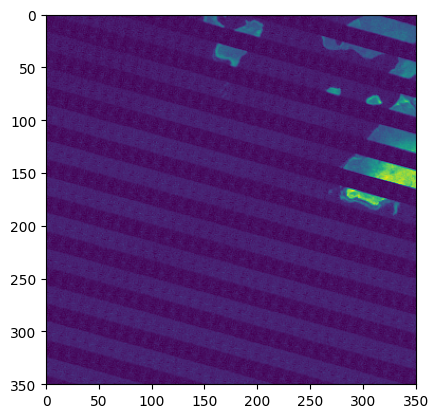

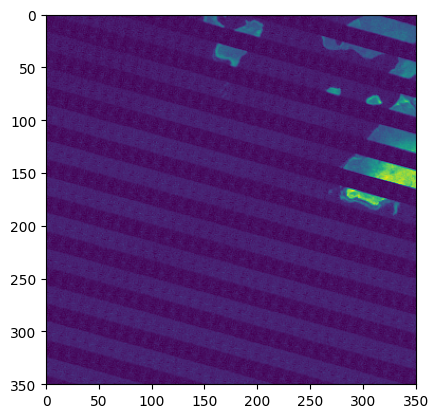

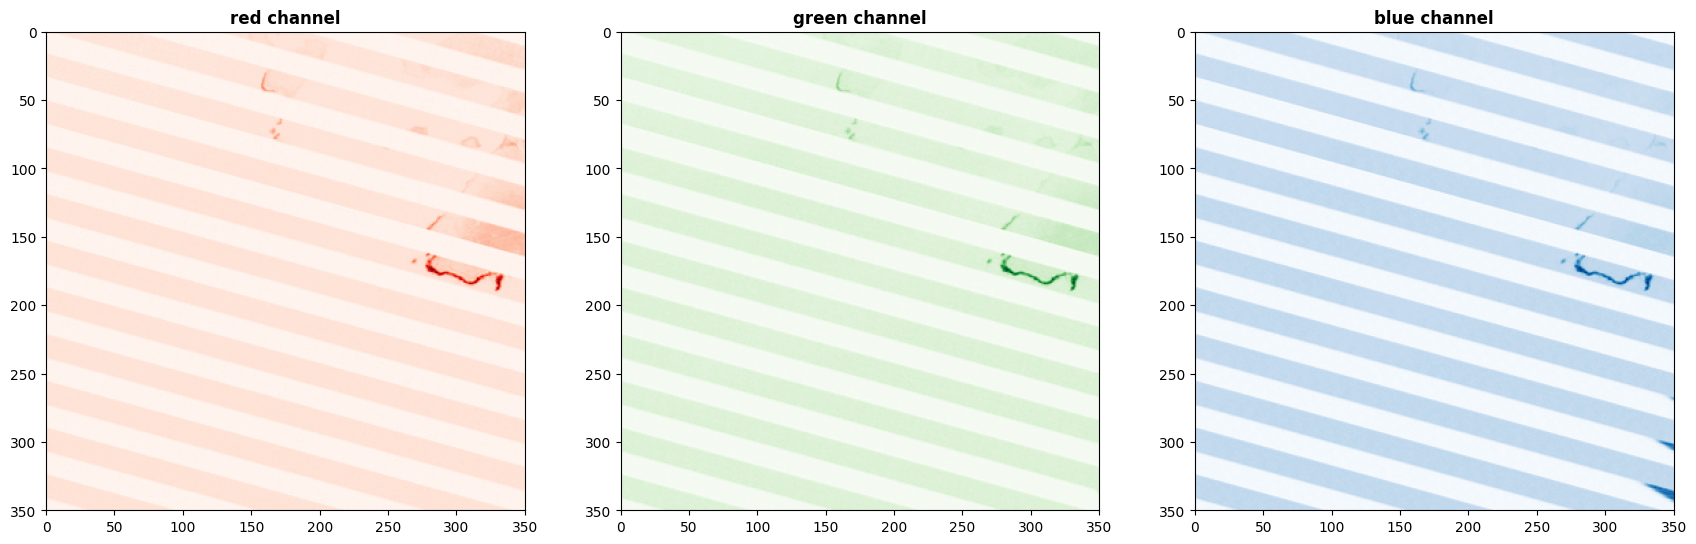

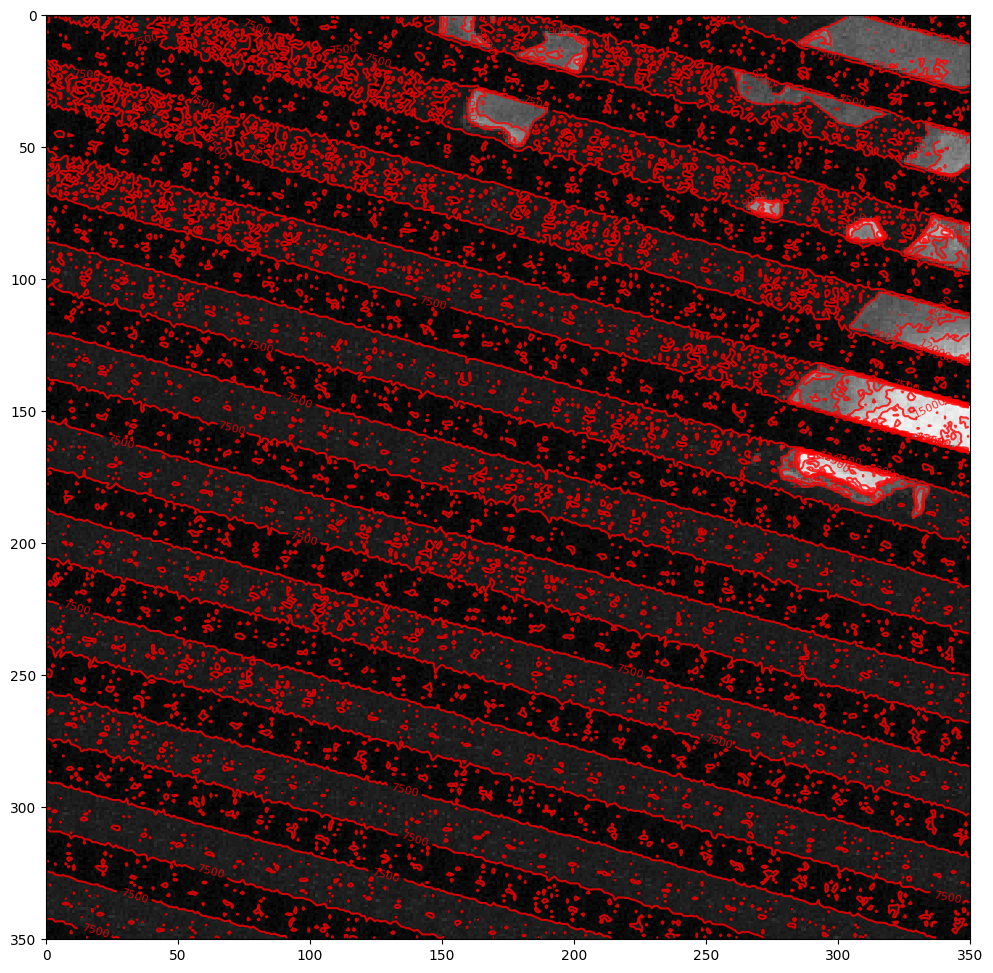

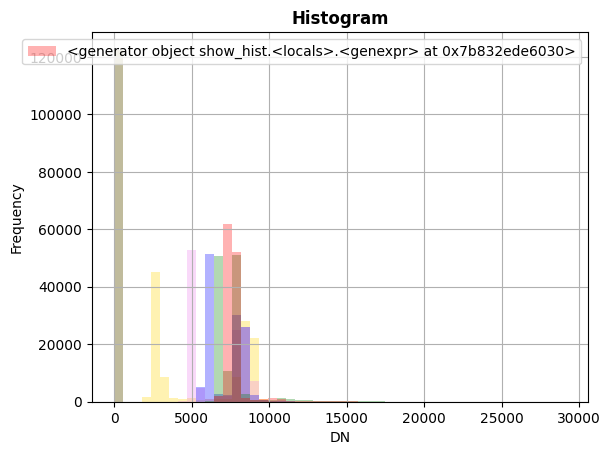

{'driver': 'GTiff', 'dtype': 'int32', 'nodata': None, 'width': 350, 'height': 350, 'count': 7, 'crs': None, 'transform': Affine(1.0, 0.0, 0.0,
       0.0, 1.0, 0.0)}
(350, 350)
(350, 350)
(350, 350)
(350, 350)
(350, 350)


In [10]:
for i in test_files_list:                                  ##### Analysing one Satellitr image data to data_array with 5 BANDS
  with rasterio.open(test_path+'/'+i) as src:
    show(src)
    show(src.read(1), transform=src.transform)
    fig, (axr, axg, axb) = pyplot.subplots(1,3, figsize=(21,7))
    show((src, 3), ax=axr, cmap='Reds', title='red channel')
    show((src, 4), ax=axg, cmap='Greens', title='green channel')
    show((src, 5), ax=axb, cmap='Blues', title='blue channel')
    fig, ax = pyplot.subplots(1, figsize=(12, 12))
    show((src, 1), cmap='Greys_r', interpolation='none', ax=ax)   #### SWIR band
    show((src, 1), contour=True, ax=ax)
    pyplot.show()

    show_hist(
    src, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram")
    print(src.meta)
    for band in range(1,6):                    ###########   Exclude 6 and 7
      data_array = src.read(band)
      print(data_array.shape)
  break


In [11]:
XX = []
for i in test_files_list:
  with rasterio.open(test_path+'/'+i) as src:
    for band in range(1,6):                    ###########   Exclude 6 and 7
      datarray = src.read(band)
      XX.append(datarray)




In [12]:
len(test_files_list)

1426

In [13]:
import numpy as np

In [14]:
XXX = np.array(XX)

In [15]:
XXX.shape

(7130, 350, 350)

In [16]:
pip install earthpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 7.9 MB/s eta 0:00:00


In [17]:
import os
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [21]:
# Landsat 8 red band is band 4 at [3]
# Landsat 8 near-infrared band is band 5 at [4]
SWIR = XXX[0]
NIR = XXX[1]
RED = XXX[2]
GREEN = XXX[3]
BLUE = XXX[4]
ndvi = es.normalized_diff(NIR,RED)
mndwi = es.normalized_diff(GREEN,SWIR)
CVI = es.normalized_diff(NIR,GREEN)
#cvi= es.normalized_diff(NIR,SWIR)

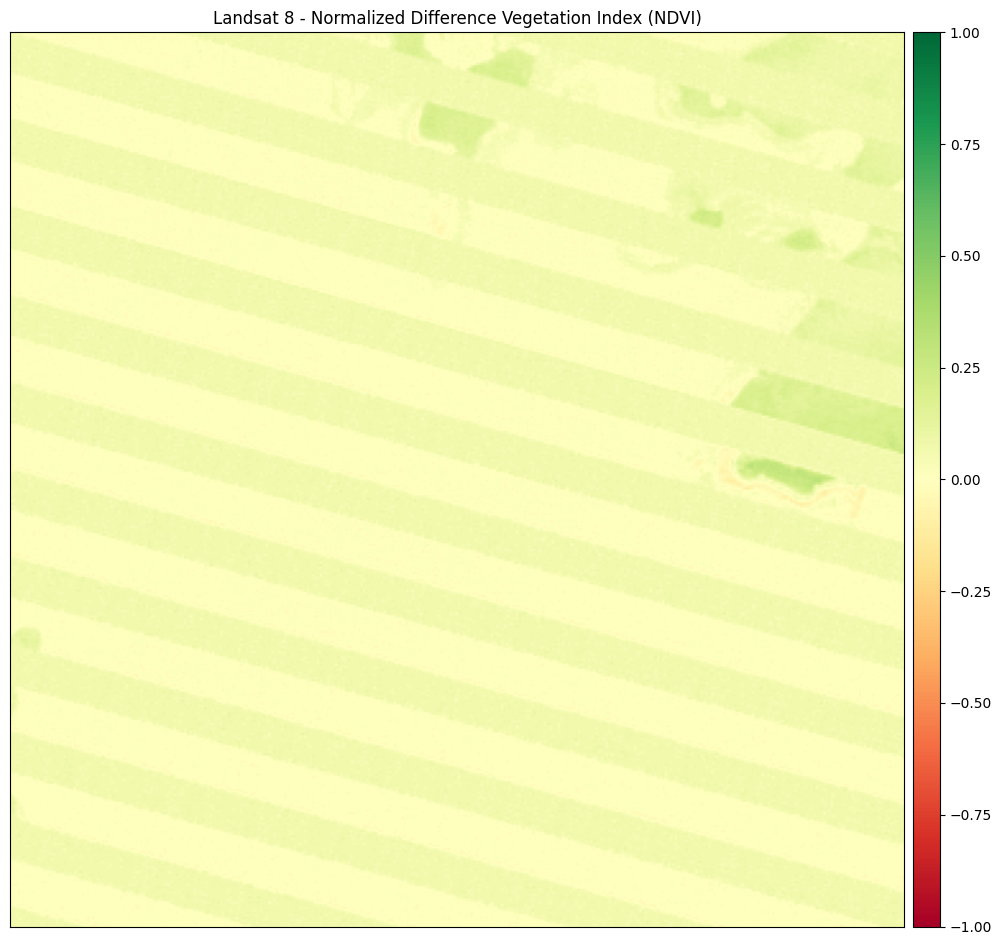

<Axes: title={'center': 'Landsat 8 - Normalized Difference Vegetation Index (NDVI)'}>

In [22]:
titles = ["Landsat 8 - Normalized Difference Vegetation Index (NDVI)"]

# Turn off bytescale scaling due to float values for NDVI
ep.plot_bands(ndvi, cmap="RdYlGn", cols=1, title=titles, vmin=-1, vmax=1)

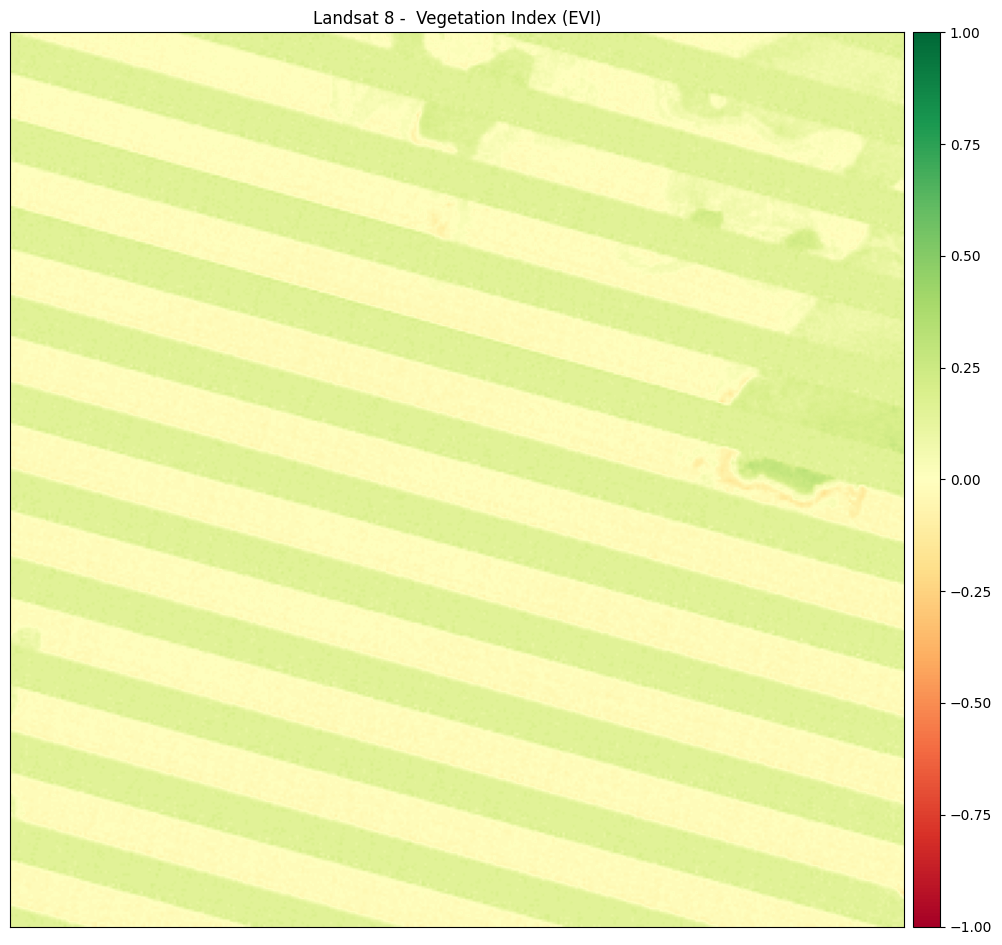

<Axes: title={'center': 'Landsat 8 -  Vegetation Index (EVI)'}>

In [23]:
titles = ["Landsat 8 -  Vegetation Index (EVI)"]

# Turn off bytescale scaling due to float values for EVI
ep.plot_bands(CVI, cmap="RdYlGn", cols=1, title=titles, vmin=-1, vmax=1)

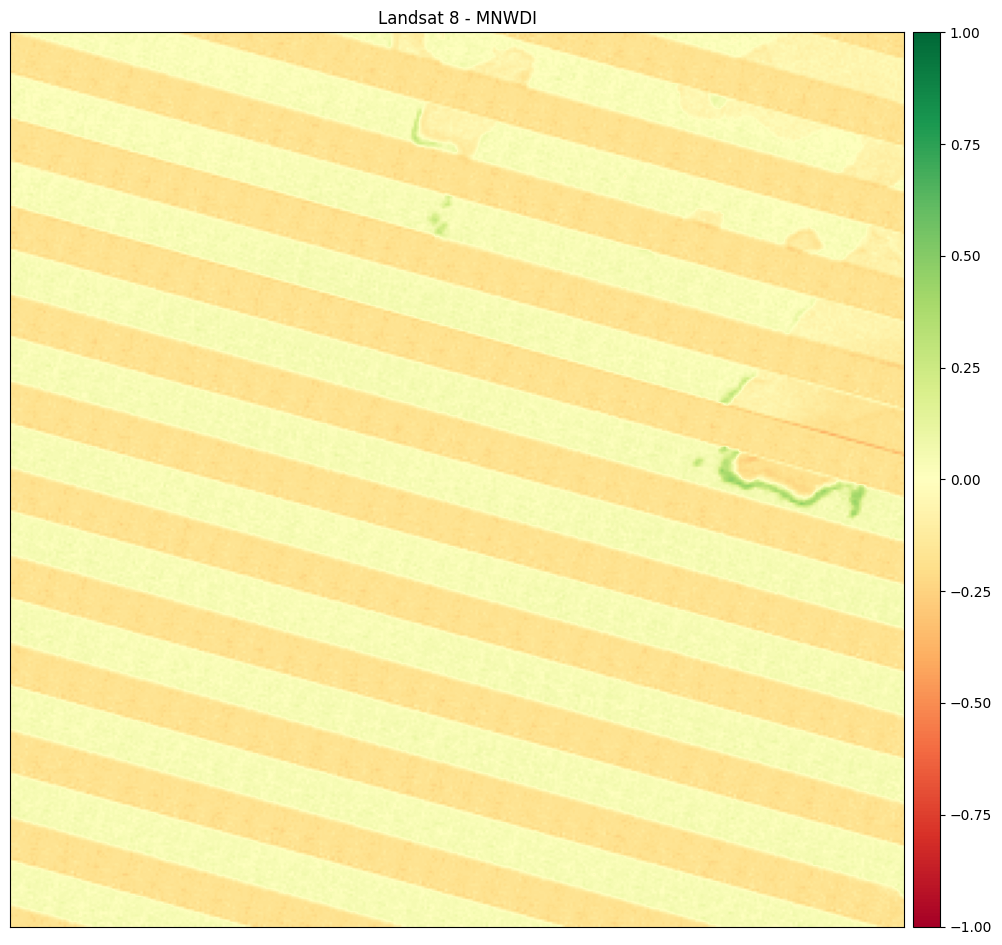

<Axes: title={'center': 'Landsat 8 - MNWDI'}>

In [61]:
titles = ["Landsat 8 - MNWDI"]

# Turn off bytescale scaling due to float values for MNWDI
ep.plot_bands(mndwi, cmap="RdYlGn", cols=1, title=titles, vmin=-1, vmax=1)

In [149]:
# Create classes and apply to NDVI results
ndvi_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, np.inf]    ##### changing
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)      #### https://www.geeksforgeeks.org/python-numpy-np-digitize-method/

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
)
np.unique(ndvi_landsat_class)

masked_array(data=[1, 2, 3, 4],
             mask=False,
       fill_value=999999)

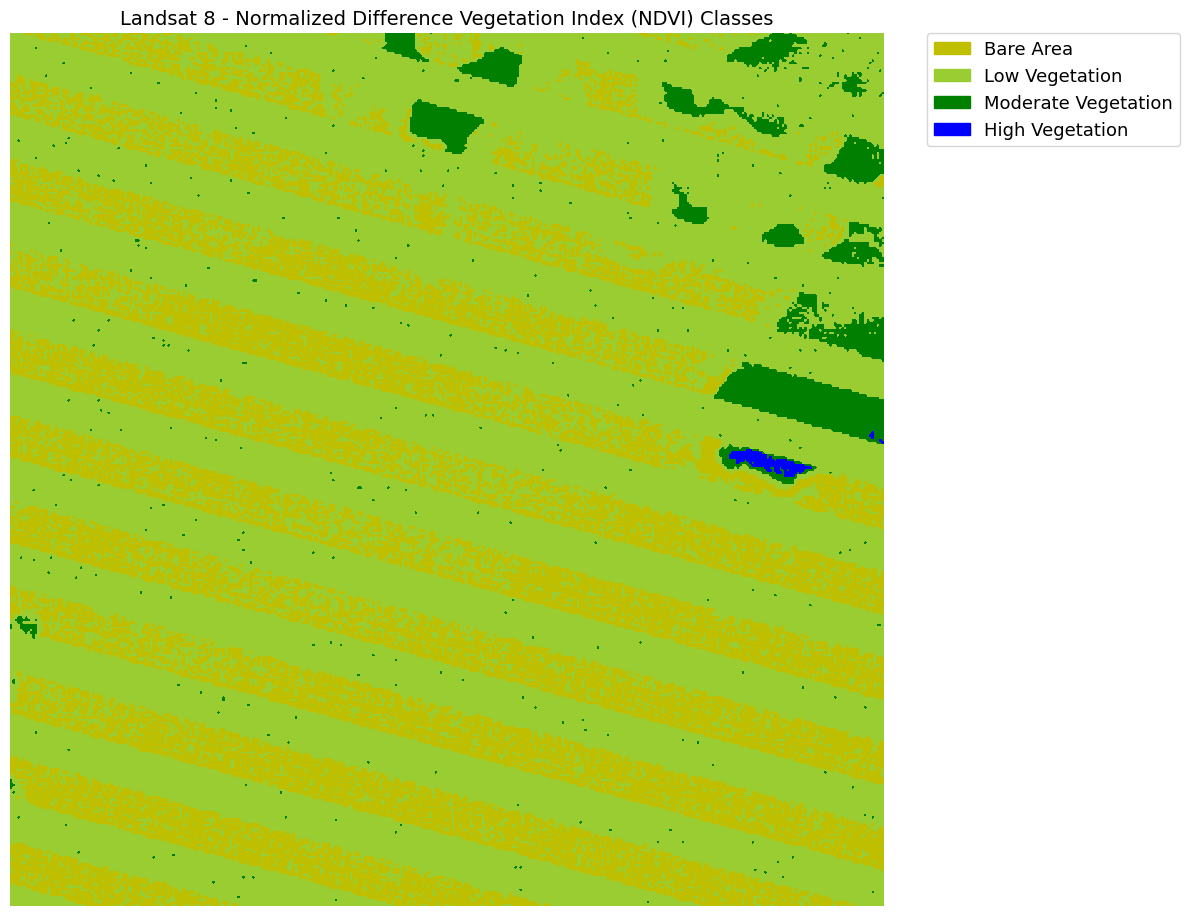

In [150]:
# Define color map
nbr_colors = [ "y", "yellowgreen", "g", "b"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "Bare Area",
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:4]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

In [147]:
# Create classes and apply to NDVI results
CVI_class_bins = [-np.inf, 0, 0.1, 0.25, 0.4, np.inf]    ##### changing
CVI_landsat_class = np.digitize(CVI, CVI_class_bins)

# Apply the nodata mask to the newly classified NDVI data
CVI_landsat_class = np.ma.masked_where(
    np.ma.getmask(CVI), CVI_landsat_class
)
np.unique(CVI_landsat_class)

masked_array(data=[1, 2, 3, 4],
             mask=False,
       fill_value=999999)

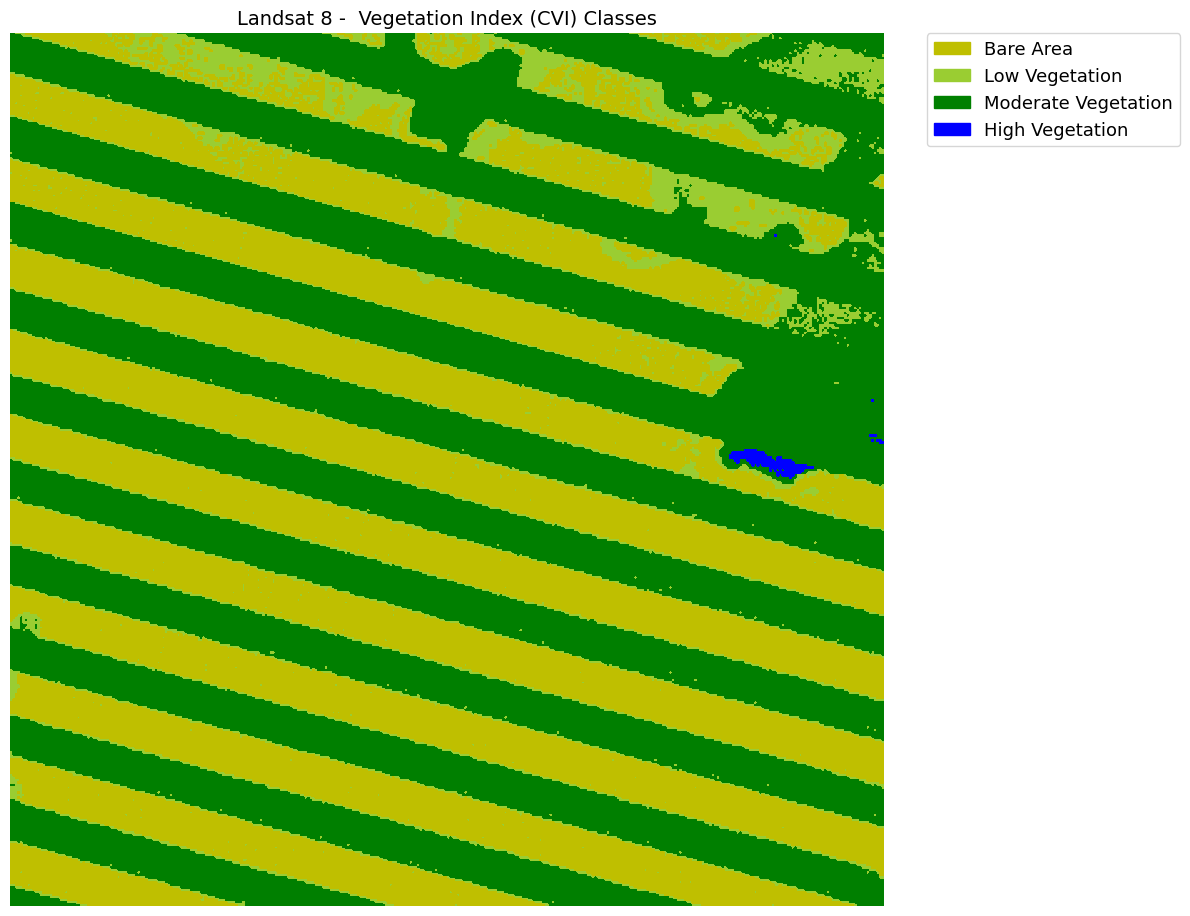

In [148]:
# Define color map
nbr_colors = [ "y", "yellowgreen", "g", "b"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
CVI_cat_names = [
    "Bare Area",
    "Low Vegetation",
    "Moderate Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(CVI_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:4]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(CVI_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=CVI_cat_names)
ax.set_title(
    "Landsat 8 -  Vegetation Index (CVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

In [27]:
ndvi.shape

(350, 350)

In [28]:
ndvi.min()

-0.12474186886938565

In [29]:
ndvi.max()

0.31475252282556465

In [30]:
ndvi.mean()

0.03751749611602948

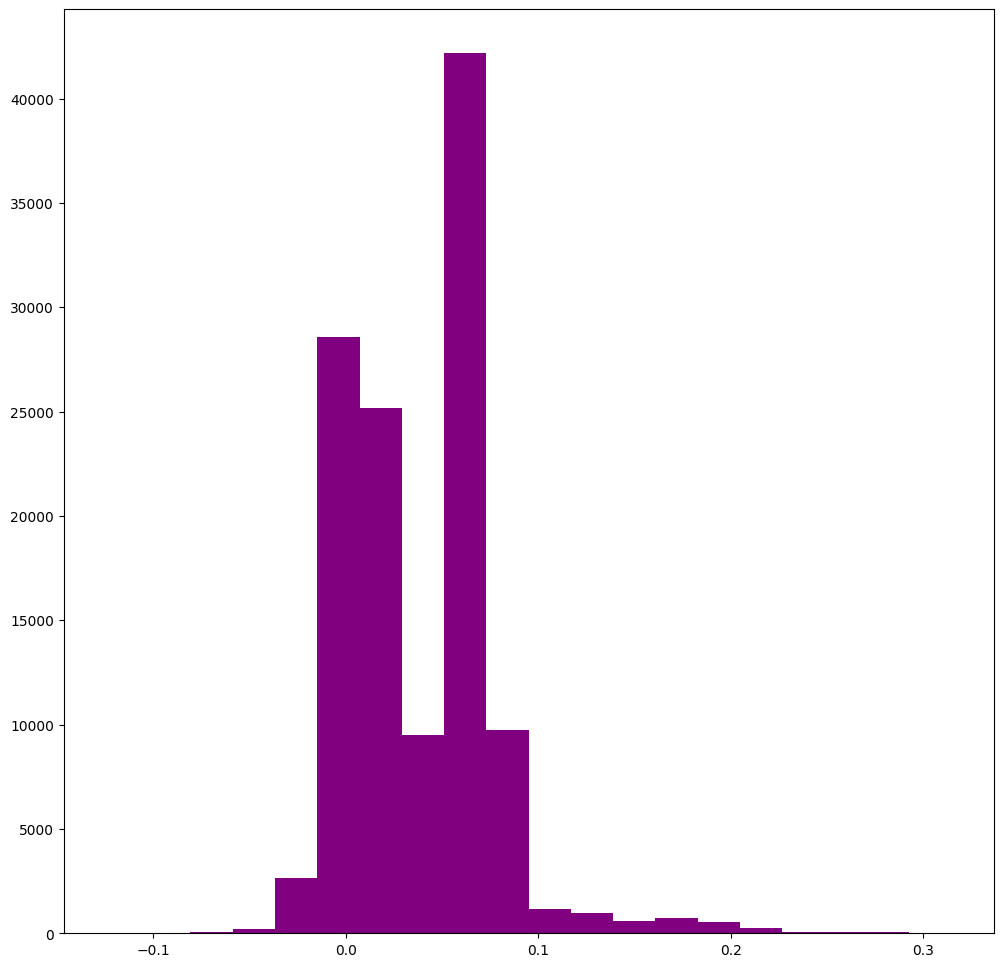

In [31]:
ep.hist(ndvi)
plt.show()

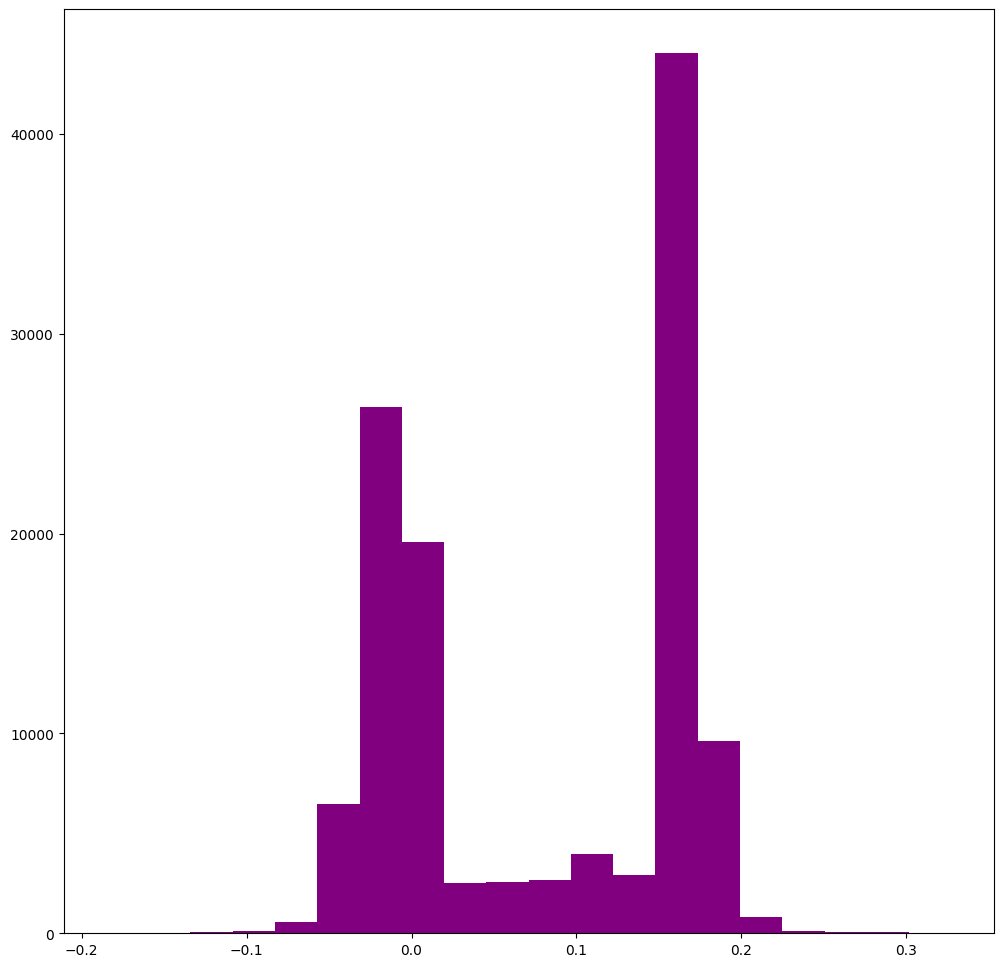

In [118]:
ep.hist(CVI)
plt.show()

In [32]:
CVI.min()

-0.18538548610237707

In [35]:
CVI.mean()

0.07510520716596966

In [34]:
CVI.max()

0.32738816103343243

In [41]:
import pandas as pd

In [119]:
flat_ndvi = ndvi.flatten()
flat_CVI = CVI.flatten()

In [120]:
df = pd.DataFrame()

In [121]:
df['ndvi'] = flat_ndvi
df['CVI'] = flat_CVI

In [122]:
df.describe()

ndvi            CVI
count  122500.000000  122500.000000
mean        0.037517       0.075105
std         0.040461       0.086340
min        -0.124742      -0.185385
25%         0.003490      -0.021581
50%         0.041459       0.102413
75%         0.063002       0.154937
max         0.314753       0.327388

In [123]:
df.head()

ndvi       CVI
0  0.084572  0.143584
1  0.063078  0.143584
2  0.042419  0.083836
3  0.024194  0.076967
4  0.005839  0.026157

In [151]:
nd =df[df['ndvi'] > 0.25]
CV=df[df['CVI'] > 0.25]

In [152]:
nd[:].value_counts().sum()

147

In [153]:
CV[:].value_counts().sum()

166

In [137]:
486*100/(350 *350)             ### only 0.39 % of area is > 0.20 NDVI Canopy

0.396734693877551

In [138]:
1037*100/(350 *350)            ### only 0.85 % of area is > 0.20 CVI Canopy

0.846530612244898

In [189]:
# Create classes and apply to NDVI results
ndvi_class_bins = [0.25, 0.4, np.inf]    ##### changing
ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)      #### https://www.geeksforgeeks.org/python-numpy-np-digitize-method/

# Apply the nodata mask to the newly classified NDVI data
ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
)
np.unique(ndvi_landsat_class)

masked_array(data=[0, 1],
             mask=False,
       fill_value=999999)

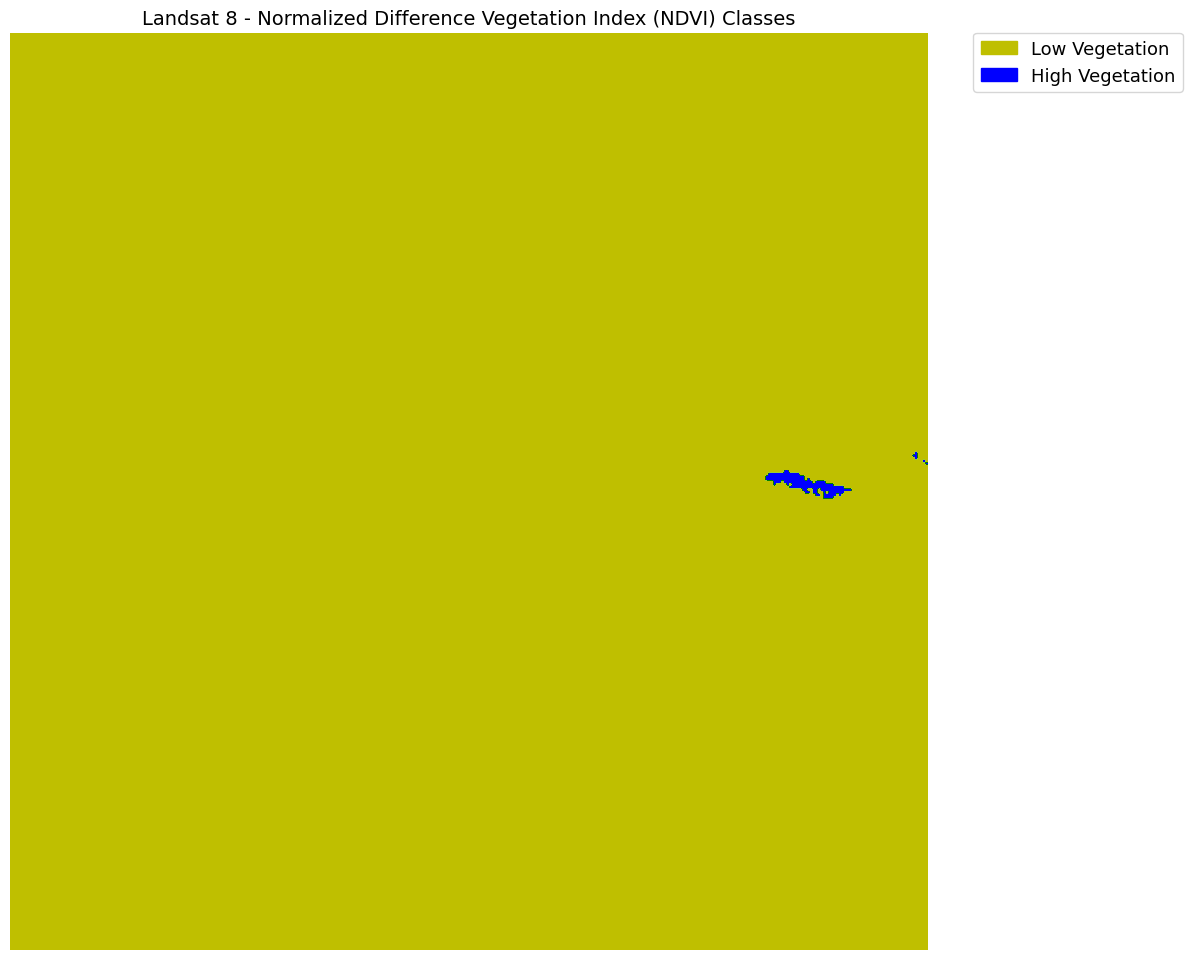

In [191]:
# Define color map
nbr_colors = [ "y", "yellowgreen", "g", "b"]
nbr_cmap = ListedColormap(nbr_colors)

# Define class names
ndvi_cat_names = [
    "Low Vegetation",
    "High Vegetation",
]

# Get list of classes
classes = np.unique(ndvi_landsat_class)
classes = classes.tolist()
# The mask returns a value of none in the classes. remove that
classes = classes[0:2]

# Plot your data
fig, ax = plt.subplots(figsize=(12, 12))
im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)

ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
)
ax.set_axis_off()

# Auto adjust subplot to fit figure size
plt.tight_layout()

1426 TEST Satellite images  choosing 5 out of 7 bands

In [192]:
data_array.shape

(350, 350)

/usr/local/lib/python3.10/dist-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[0 1]


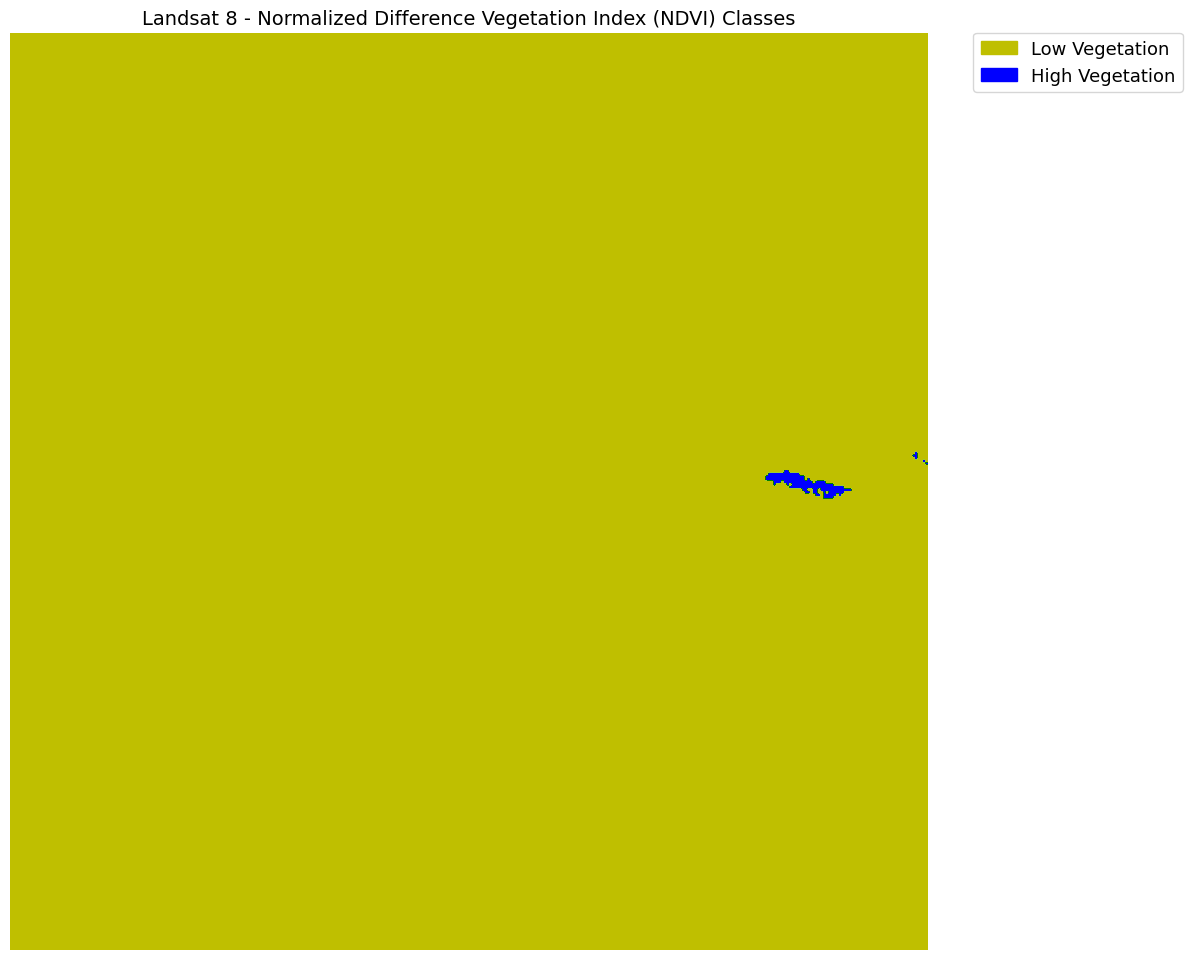

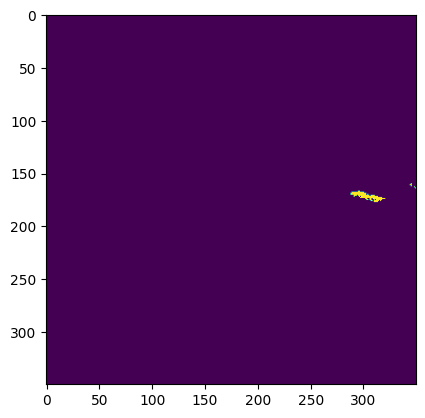

[0 1]


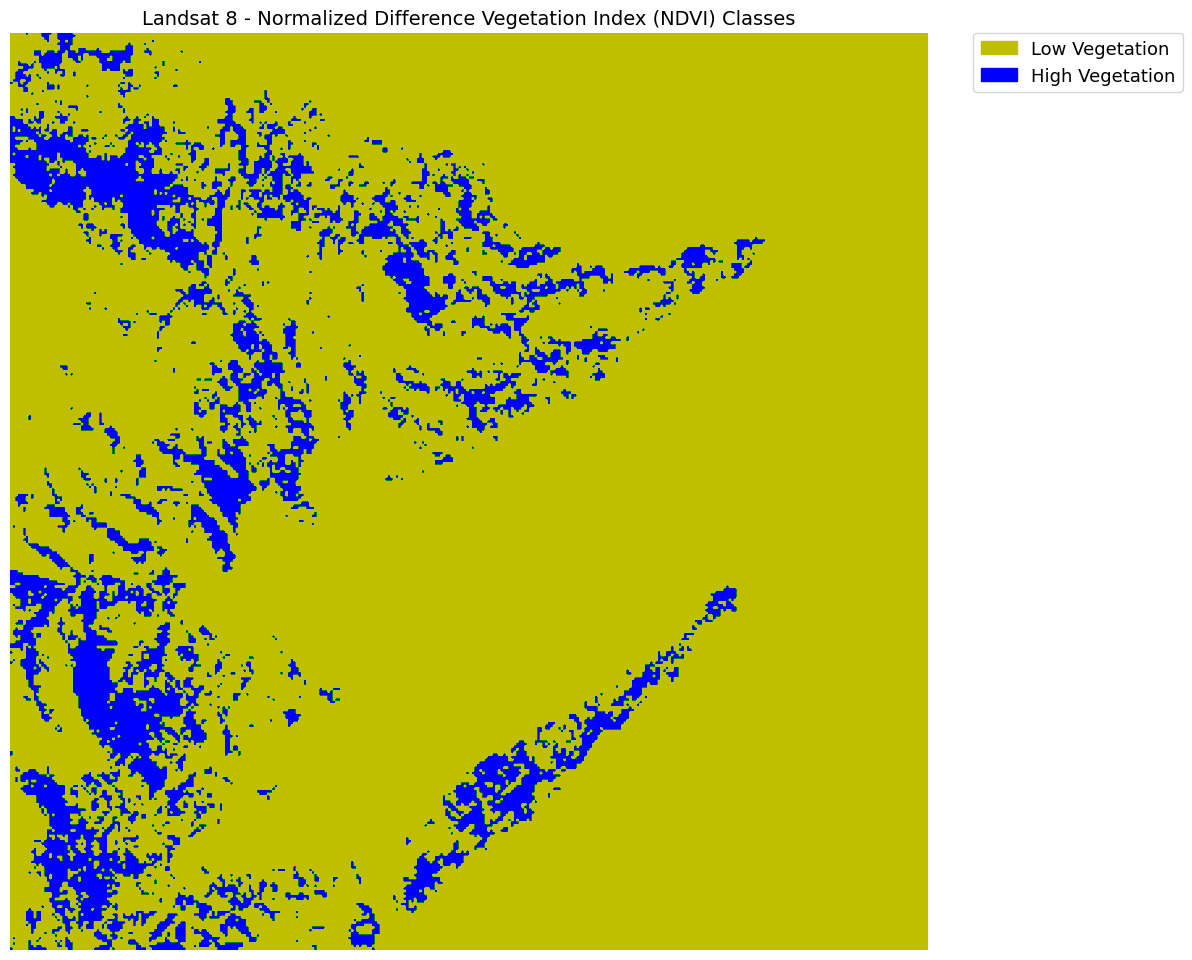

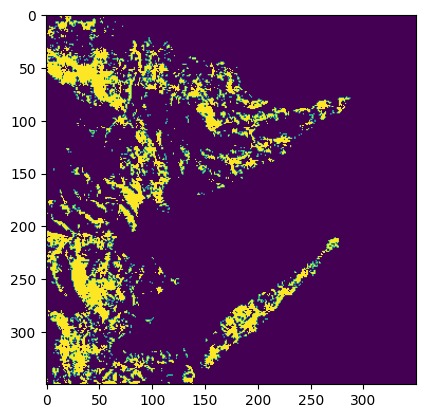

[0 1]


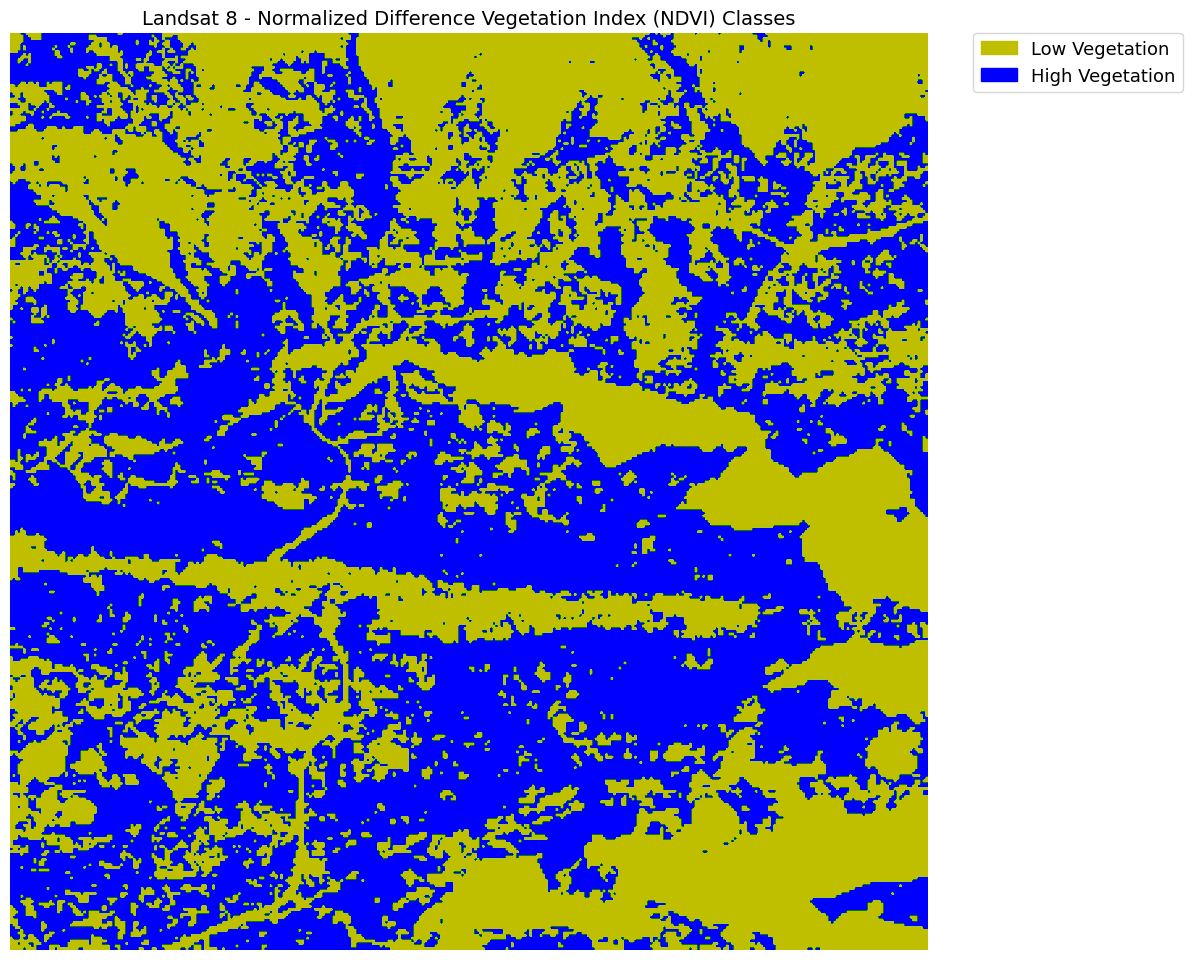

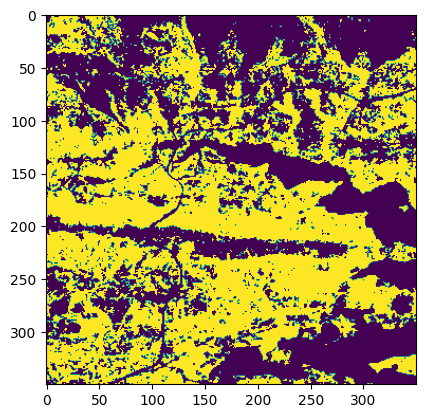

[0 1]


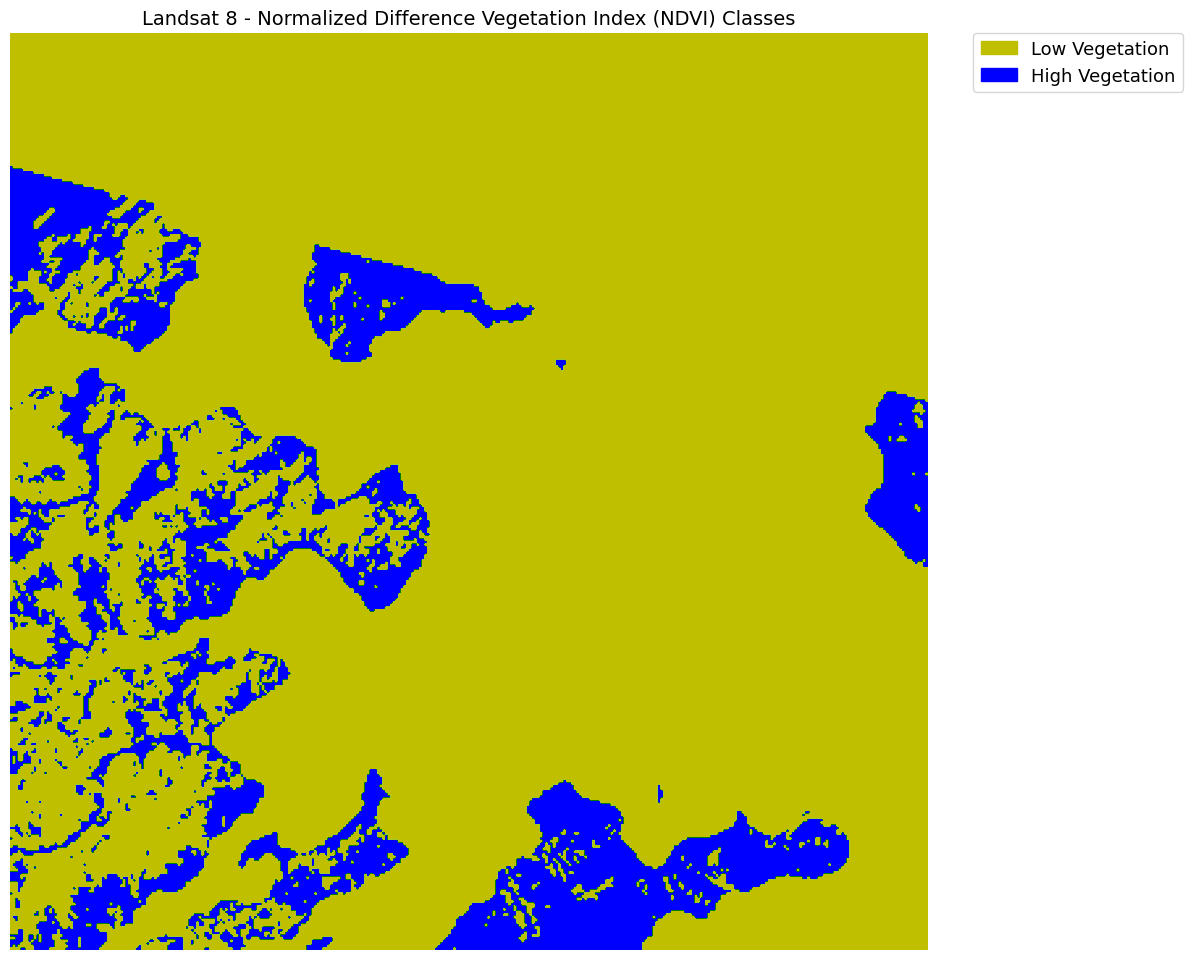

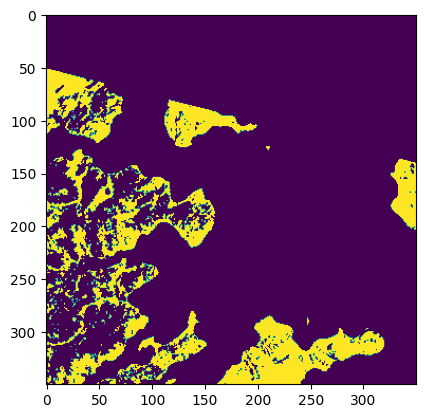

[0 1]


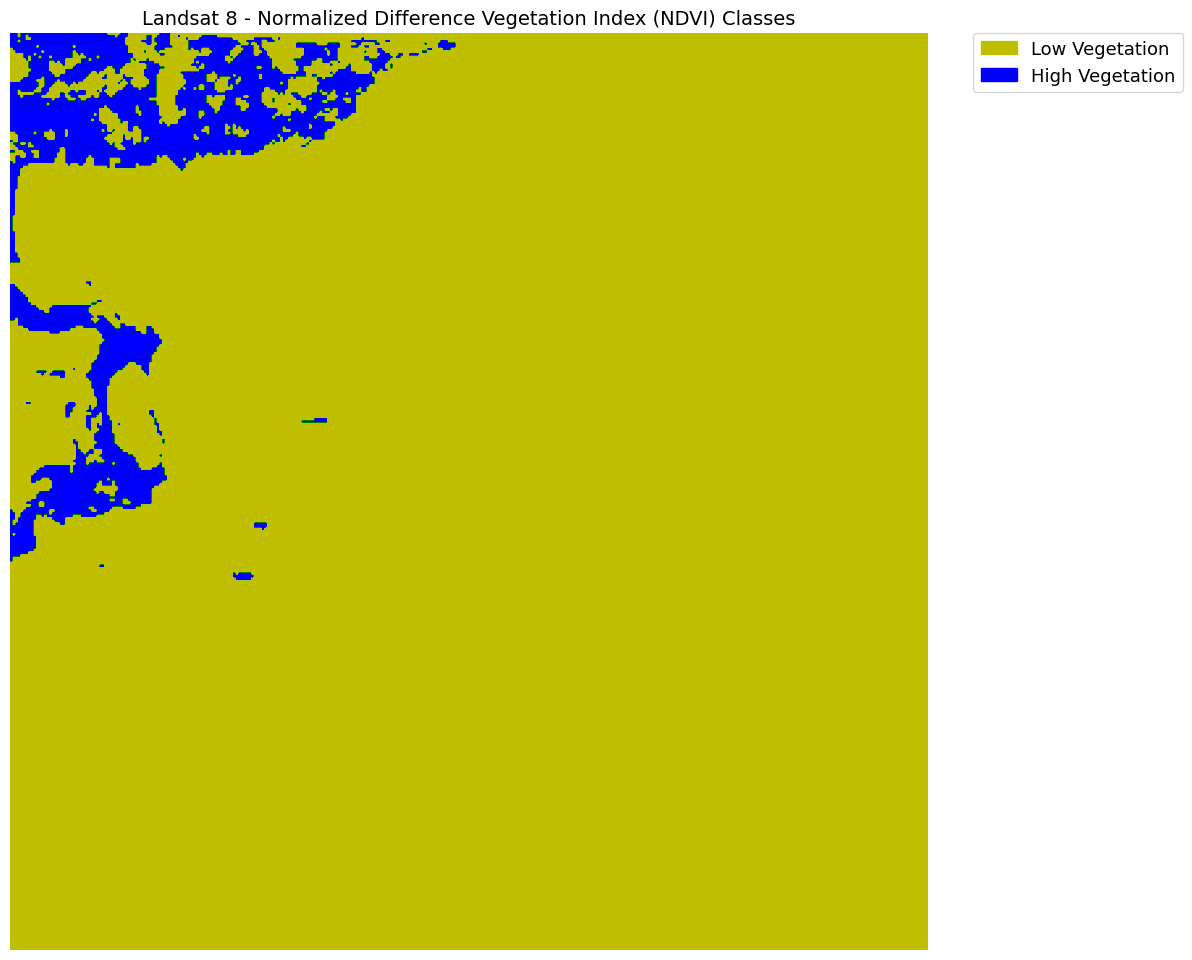

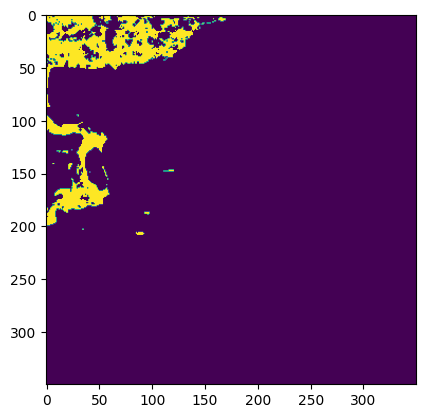

In [260]:
stop = 0
for i in test_files_list:                                  ##### POPULATE all data to data_array with 6 BANDS
  with rasterio.open(test_path+'/'+i) as src:
                                                      ###########   Exclude 7
    data_array = src.read([1,2,3,4,5,6])
    XXX  = data_array
    SWIR = XXX[0]
    NIR = XXX[1]
    RED = XXX[2]
    GREEN = XXX[3]
    BLUE = XXX[4]
    CLOUD = XXX[5]
    ndvi = es.normalized_diff(NIR,RED)
    mndwi = es.normalized_diff(GREEN,SWIR)
    CVI = es.normalized_diff(NIR,GREEN)
    ndvi_class_bins = [0.25,1]
    ndvi_landsat_class = np.digitize(ndvi, ndvi_class_bins)
    ndvi_landsat_class = np.ma.masked_where(
    np.ma.getmask(ndvi), ndvi_landsat_class
    )
    classes = np.unique(ndvi_landsat_class)
    print(classes)
    classes = classes.tolist()
    classes = classes[0:2]
    fig, ax = plt.subplots(figsize=(12, 12))
    im = ax.imshow(ndvi_landsat_class, cmap=nbr_cmap)
    ep.draw_legend(im_ax=im, classes=classes, titles=ndvi_cat_names)
    ax.set_title(
    "Landsat 8 - Normalized Difference Vegetation Index (NDVI) Classes",
    fontsize=14,
    )
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

    NDVI_binary = np.digitize(ndvi, ndvi_class_bins)
    NDVI_masked_with_cloud = np.ma.masked_where(
    np.ma.getmask(CLOUD), NDVI_binary)
    show(NDVI_masked_with_cloud)
    stop = stop+1
    if stop == 5:
      break


In [240]:
NDVI_df = pd.DataFrame()
NDVI_df['NDVI'] = ndvi.flatten()
NDVI_df['NDVI_class'] = NDVI_binary.flatten()
NDVI_df.head()

NDVI  NDVI_class
0  0.294278           1
1  0.275291           1
2  0.267807           1
3  0.246981           0
4  0.265409           1

In [243]:
NDVI_df['NDVI_class'].value_counts()

0    116056
1      6444
Name: NDVI_class, dtype: int64

In [241]:
NDVI_df.describe()

NDVI     NDVI_class
count  122500.000000  122500.000000
mean        0.022798       0.052604
std         0.076103       0.223243
min        -0.131260       0.000000
25%        -0.008609       0.000000
50%         0.002257       0.000000
75%         0.004093       0.000000
max         0.493507       1.000000

In [261]:
NDVI_masked_with_cloud = np.ma.masked_where(
    np.ma.getmask(CLOUD), NDVI_binary)


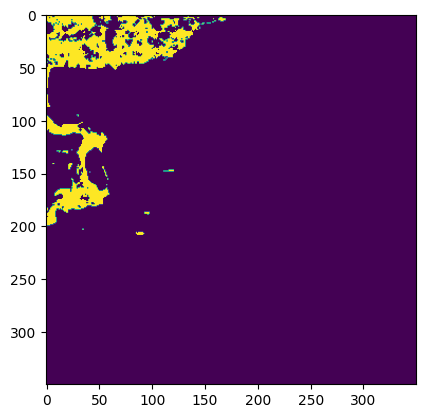

<Axes: >

In [262]:
show(NDVI_masked_with_cloud)

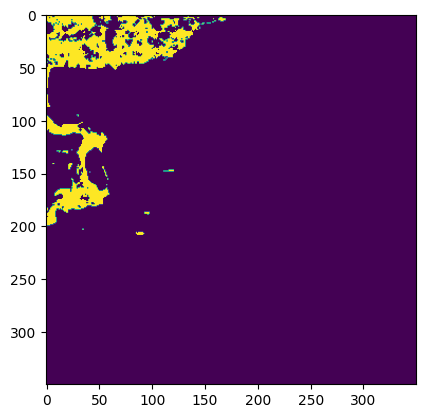

<Axes: >

In [263]:
show(NDVI_binary)

In [265]:
NDVI_df['NDVI_with_cloud_mask'] = NDVI_masked_with_cloud.flatten()
NDVI_df.head()

NDVI  NDVI_class  NDVI_with_cloud_mask
0  0.294278           1                     1
1  0.275291           1                     1
2  0.267807           1                     1
3  0.246981           0                     0
4  0.265409           1                     1

In [266]:
NDVI_df['NDVI_with_cloud_mask'].value_counts()

0    116056
1      6444
Name: NDVI_with_cloud_mask, dtype: int64

In [267]:
NDVI_df['NDVI_class'].value_counts()

0    116056
1      6444
Name: NDVI_class, dtype: int64

RED with NDVI masking

In [270]:
RED

array([[10613, 10613, 10444, ...,  7564,  7564,  7564],
       [10782, 10613, 10444, ...,  7564,  7564,  7564],
       [10444, 10444, 10276, ...,  7564,  7733,  7733],
       ...,
       [ 7725,  7726,  7726, ...,  7737,  7567,  7737],
       [ 7555,  7896,  7726, ...,  7737,  7737,  7737],
       [ 7555,  7896,  7726, ...,  7737,  7737,  7737]], dtype=int32)

In [284]:
def masking(RED, NDVI_binary):

  # masking the array1 by using array2
  # where array2 mod 7 is true
  mask = np.ma.masked_where(NDVI_binary,RED)

  return mask

In [290]:
# calling masking function to get
  # masked array
masked_RED= masking(RED,NDVI_binary)

  # getting the values as 1-d array which
  # are non masked
#masked_RED = np.ma.compressed(masked_RED)

  # printing the values
print(masked_RED)

[[-- -- -- ... 7564 7564 7564]
 [-- -- -- ... 7564 7564 7564]
 [-- -- -- ... 7564 7733 7733]
 ...
 [7725 7726 7726 ... 7737 7567 7737]
 [7555 7896 7726 ... 7737 7737 7737]
 [7555 7896 7726 ... 7737 7737 7737]]


In [292]:
NDVI_df['RED'] = RED.flatten()
NDVI_df['RED_with_NDVI_mask']= masked_RED.flatten()
NDVI_df.head()

NDVI  NDVI_class  NDVI_with_cloud_mask  RED_with_NDVI_mask    RED
0  0.294278           1                     1                 NaN  10613
1  0.275291           1                     1                 NaN  10613
2  0.267807           1                     1                 NaN  10444
3  0.246981           0                     0             10444.0  10444
4  0.265409           1                     1                 NaN  10613

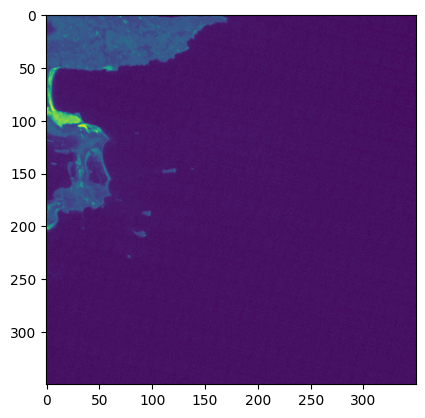

<Axes: >

In [293]:
show(RED)

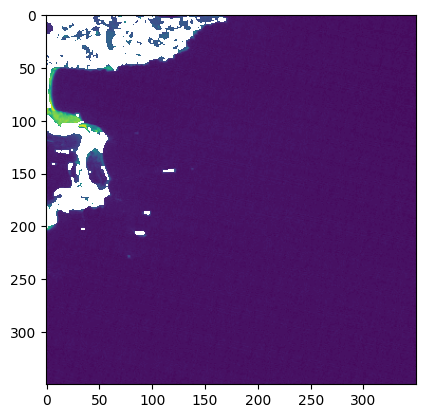

<Axes: >

In [294]:
show(masked_RED)

In [295]:
def masking(NDVI_binary,CLOUD):

  # masking the array1 by using array2
  # where array2 mod 7 is true
  mask = np.ma.masked_where(NDVI_binary,CLOUD)

  return mask

In [296]:
masked_NDVI_binary= masking(NDVI_binary,CLOUD)

  # getting the values as 1-d array which
  # are non masked
#masked_RED = np.ma.compressed(masked_RED)

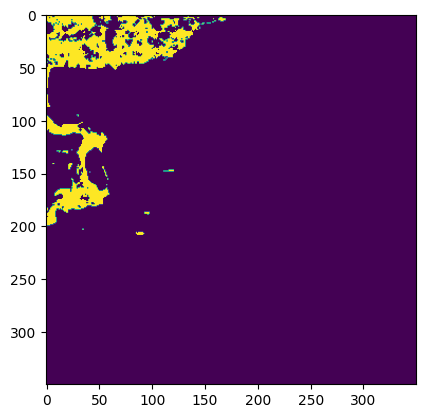

<Axes: >

In [299]:
show(NDVI_binary)

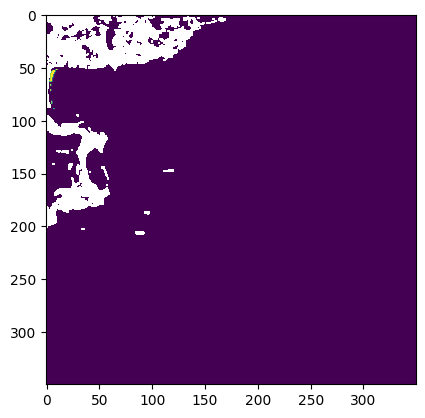

<Axes: >

In [300]:
show(masked_NDVI_binary)